In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cv2 as cv
from sklearn.model_selection import train_test_split

In [67]:
#Create a 2D cluster of 50 points with mean: 
number_points = 50
mean0 = (20, 30) #mean_x, mean_y
cov0 = [[3, 0], [0, 10]] #s_x = 3, s_y = 20
Data0 = np.random.multivariate_normal(mean0, cov0, number_points)   # red = 0
Data0 = np.concatenate((Data0, np.zeros((number_points, 1))), axis=1)
#Create a 2D cluster of 50 points with mean: 
mean1 = (40, 40) #mean_x, mean_y
cov1 = [[10, 0], [0, 10]] #s_x = 10, s_y = 10
Data1 = np.random.multivariate_normal(mean1, cov1, number_points)  # blue = 1
Data1 = np.concatenate((Data1, np.ones((number_points, 1))), axis=1)
#Create a 2D cluster of 50 points with mean: 
mean2 = (50, 40) #mean_x, mean_y
cov2 = [[15, 0], [0, 15]] #s_x = 15, s_y = 15
Data2= np.random.multivariate_normal(mean2, cov2, number_points)  # yellow = 2
Data2 = np.concatenate((Data2, 2*np.ones((number_points, 1))), axis=1)

In [68]:
#Combine all data into one array and split it into features and labels
Data = np.concatenate((Data0, Data1, Data2), axis=0)
features = Data[:, 0:2]
labels = Data[:, 2]

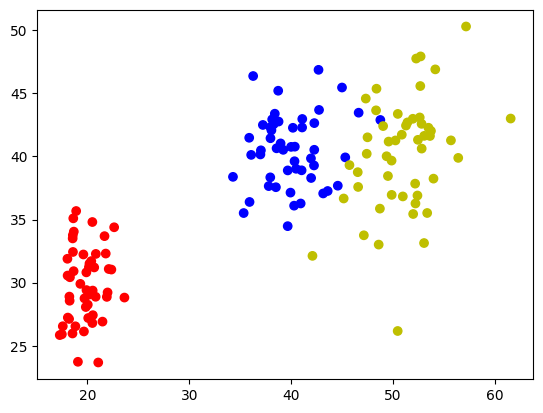

In [69]:
#Define a custom colormap
cmap2 = colors.ListedColormap(['r', 'b', 'y'])
#Plot the scatter plot with the custom colormap
plt.scatter(Data[:,0], Data[:,1], c=Data[:,2], cmap=cmap2)
plt.show()

In [70]:
training_features, testing_features, training_labels, testing_labels = train_test_split(features, labels, test_size=0.3, random_state=42)
training_features = np.array(training_features, dtype=np.float32)
training_labels = np.array(training_labels, dtype=np.float32)
testing_features = np.array(testing_features, dtype=np.float32)
#print("\nTraining features: \n", training_features)
#print("\nTraining Labels: \n", training_labels) 
#print("\nTesting Labels: \n", testing_labels) 

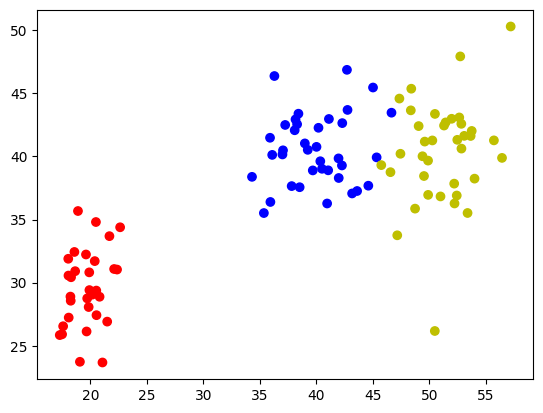

In [71]:
# plot train data
plt.scatter(training_features[:,0], training_features[:,1], c=training_labels, cmap=cmap2)
plt.show()


In [72]:
knn = cv.ml.KNearest_create()
knn.train(training_features, cv.ml.ROW_SAMPLE, training_labels)
k=5
ret, predicted_labels, neighbours, dist = knn.findNearest(testing_features, k)
#print("Predicted Labels: \n", predicted_labels.ravel())
#print("Testing Labels: \n", testing_labels)
number_correct = np.sum(testing_labels == predicted_labels.ravel())
#print ("\nNumber of correct predictions: %d Out of total test cases %d." %(number_correct, testing_labels.shape[0]))
# total accuracy
from sklearn.metrics import accuracy_score
accuracy_percent = accuracy_score(testing_labels, predicted_labels) * 100
print ("\nKNN Accuracy: %5.2f%%" %accuracy_percent)


KNN Accuracy: 93.33%


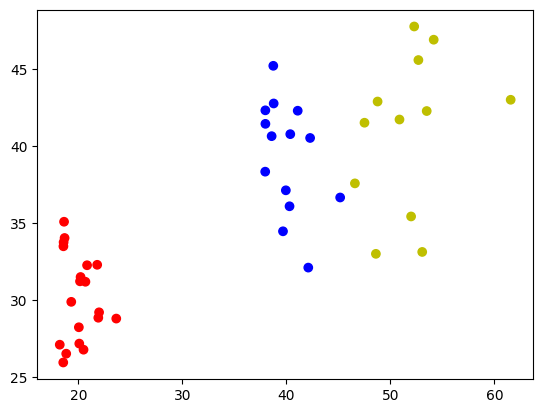

In [73]:
# plot test data
plt.scatter(testing_features[:,0], testing_features[:,1], c=predicted_labels, cmap=cmap2)
plt.show()

In [74]:
# group by target find each mean
df = pd.DataFrame(training_features)
df['target'] = training_labels
df.columns = ['x', 'y', 'target']
df = df.groupby('target').mean()
print(df)
# df.values[0]

                x          y
target                      
0.0     19.657518  29.548538
1.0     39.958965  40.525822
2.0     51.111813  40.355164


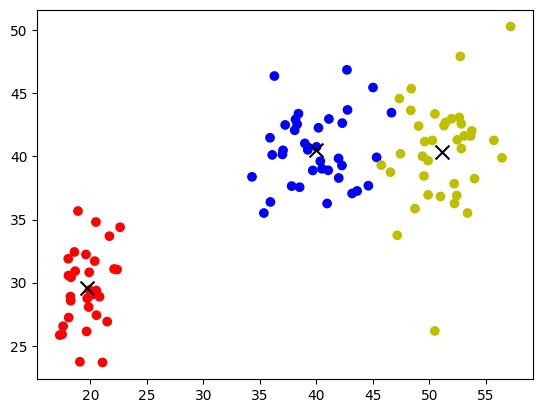

In [75]:
# plot test data
plt.scatter(training_features[:,0], training_features[:,1], c=training_labels, cmap=cmap2)
plt.scatter(df.values[:,0], df.values[:,1], c='k', marker='x', s=100)
plt.show()

In [76]:
min_indices = []
for test_feature in testing_features:
    min_distance = np.inf
    min_index = -1
    for i in range(0, len(df.values)):
        distance = np.linalg.norm(test_feature - df.values[i]) # (x1-x2)^2 + (y1-y2)^2
        if distance < min_distance:
            min_distance = distance
            min_index = i
    min_indices.append(min_index)

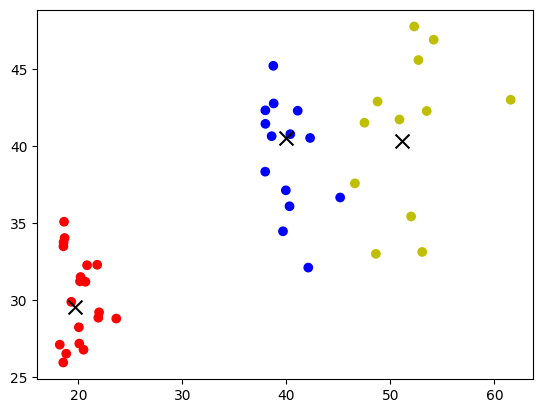

In [77]:
# plot test data
plt.scatter(testing_features[:,0], testing_features[:,1], c=min_indices, cmap=cmap2)
plt.scatter(df.values[:,0], df.values[:,1], c='k', marker='x', s=100)
plt.show()

In [78]:
#print("Predicted Labels: \n", min_indices)
#print("Testing Labels: \n", testing_labels)
number_correct = np.sum(testing_labels == min_indices)
#print ("\nNumber of correct predictions: %d Out of total test cases %d." %(number_correct, testing_labels.shape[0]) )
# total accuracy
from sklearn.metrics import accuracy_score
accuracy_percent_mean = accuracy_score(testing_labels, min_indices) * 100
print ("\ncluster mean Accuracy: %5.2f%%" %accuracy_percent_mean)


cluster mean Accuracy: 93.33%
